# Deep Learning for Business Applications course

## TOPIC 16: Named Entity recognition (NER)

### 1. Intro

NER is the task of finding and classifying named entities in unstructured text such as organizations, locations, phone numbers, persons, dates, amounts of money, etc. Below is an example of text with named entities highlighted.

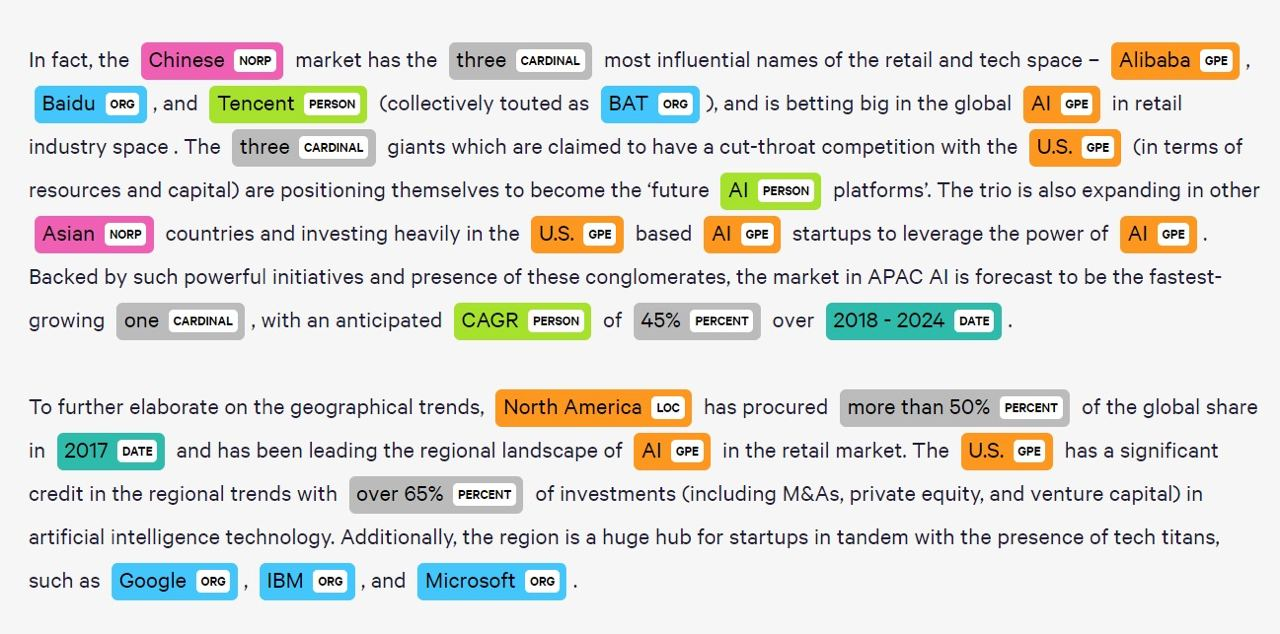

NER has a wide range of applications:
* News aggregators highlight named entities in articles to form a collection of news about specific individuals, organizations, or locations.
* Businesses use NER to automate incoming document processing, such as identifying sender and company names.
* NER is part of the voice assistants.
* NER can even be used in creating trading strategies on the stock exchange: you can extract articles from the news flow that correspond to a specific stock ticker and use their vector representations for forecasting.

The problem is quite well studied, and several methods have been developed to solve it:

* Rule-based approach
    * Regular Expressions
    * Grammars
    * Dictionaries
* Statistical methods based:
    * Any models for classification, such as gradient boosting.
    * Conditional Random Fields (CRFs).
* Neural networks:
    * RNN (LSTM, GRU)
    * Transformers (BERT, RoBERTa, XLNet...)

### 2. Token Classification

The NER problem can be reduced to a token classification problem.

Suppose we have a sequence of vectors
$$x_{1}, x_{2},..., x_{t}, ..., x_{n}$$

Each vector can be embedding of a token in a sentence, paragraph or text.

We also have a set of classes
$$C=\{1, 2, ..., k\}$$
that each token can belong to.

The task is to determine which class each token belongs to. So the input and target looks like this:

<table>
    <tr>
        <th>Input</th>
        <td>$x_{1}$</td>
        <td>$x_{2}$</td>
        <td>$...$</td>
        <td>$x_{t}$</td>
        <td>$...$</td>
        <td>$x_{n}$</td>
    </tr>
    <tr>
        <th>Target</th>
        <td>$c_{1}$</td>
        <td>$c_{2}$</td>
        <td>$...$</td>
        <td>$c_{t}$</td>
        <td>$...$</td>
        <td>$c_{n}$</td>
    </tr>
</table>

where $c_{t} ∈ C$ is a class of token at timestep $t$. See the next section for a clear example.

There are tasks that can be reduced to token classification. Here are some of them:
* NER. We have discussed this before.
* Part-of-speech tagging (POS-tagging). In this task, you need to predict the part of speech (NOUN, VERB, ADJ, etc.) for each token.
* Keyphrase Extraction. Here you need to determine whether the token is part of the keyphrase or not. Keyphrase is a term that captures the essence of the topic of a document.


### 3. Data format

Training datasets for the NER model are usually created by people for a specific business case. People usually use labeling tools like <a href="https://labelstud.io/">Label Studio</a>. Users load the data and starts labeling texts, after which they download files with texts and labels. In the case of NER, labels will contain the start and end positions of the entities, as well as their classes. This labels need to be converted to the format of the token classification model that we defined in the previous section.

Consider the following piece of text:

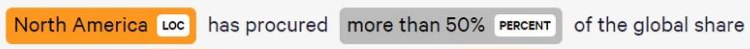

Data can be represented as table:

<table>
    <tr>
        <th>Token</th>
        <th>Label</th>
    </tr>
    <tr>
        <td>North</td>
        <td>B-LOC</td>
    </tr>
    <tr>
        <td>America</td>
        <td>I-LOC</td>
    </tr>
    <tr>
        <td>has</td>
        <td>O</td>
    </tr>
    <tr>
        <td>been</td>
        <td>O</td>
    </tr>
    <tr>
        <td>procured</td>
        <td>O</td>
    </tr>
    <tr>
        <td>more</td>
        <td>B-PERCENT</td>
    </tr>
    <tr>
        <td>than</td>
        <td>I-PERCENT</td>
    </tr>
    <tr>
        <td>50</td>
        <td>I-PERCENT</td>
    </tr>
    <tr>
        <td>%</td>
        <td>I-PERCENT</td>
    </tr>
    <tr>
        <td>of</td>
        <td>O</td>
    </tr>
    <tr>
        <td>the</td>
        <td>O</td>
    </tr>
    <tr>
        <td>global</td>
        <td>O</td>
    </tr>
    <tr>
        <td>share</td>
        <td>O</td>
    </tr>
</table>

This is the so-called BIO format (<a href="https://en.wikipedia.org/wiki/Inside%E2%80%93outside%E2%80%93beginning_(tagging)">Inside–outside–beginning</a>).

As you can see, the text was transformed into tokens and each token was assigned a label. Tokens that were not highlighted in the text received an $O$ (outside) label. The rest of the tokens were assigned the labels $LOC$ and $PERCENT$.

But each of these labels is prefixed with $B-$ (beginning) or $I-$ (inside). Why is this needed? Imagine that several entities of the PERCENT class are located in the text one after another, that is, there are no tokens from other classes between them. From the model point of view, this is one big entity of the PERCENT class. But if we add $B-$ and $I-$ prefixes, then we show the model where each entity begins and where it continues. The end of the entity is easy to determine when the token label changes from $I-$ to $B-$ or to $O$.

There are modifications to this markup, such as BIOE and BIOES, but they produce additional classes and are redundant.

### 4. Transformers

A truly revolutionary article was published at the end of 2017. It has provocative title <a href="https://arxiv.org/pdf/1706.03762.pdf">Attention Is All You Need</a>.

The authors proposed the transformer architecture, which broke all records in terms of quality in the machine translation. It also trained and made predictions faster than other architectures.

The transformer is based on the encoder-decoder architecture. The encoder and decoder consist of many layers, and each implements the self-attention mechanism. We will not delve into the logic of the self-attention mechanism. Let's just say that each transformer layer produces contextual embeddings for each input token.

As you remember, in the case of word2vec, embeddings are trained on the context, but the result is a static matrix of embeddings for each word. In other words, embedding for a particular word will always be the same. The problem is that depending on the context, the word can have different meanings. For example, the word "can" could be a verb expressing ability, or it could be a noun describing capacity for something. The word2vec model makes no such distinction.

But the transformer is able to distinguish the meanings of words depending on the context. The embedding of the same word will change depending on what sequence of words you feed into the model.

It should also be mentioned that unlike RNN which processes tokens sequentially, the transformer processes all tokens at once in parallel.



### 5. BERT

BERT (Bidirectional Encoder Representations from Transformers) is Encoder network from Transformer developed by Google. Again, we will not delve into the mechanism of its work, but we will figure out how we can train the NER model using BERT. Let's look at the picture from the <a href="https://arxiv.org/pdf/1810.04805.pdf">original paper</a>.

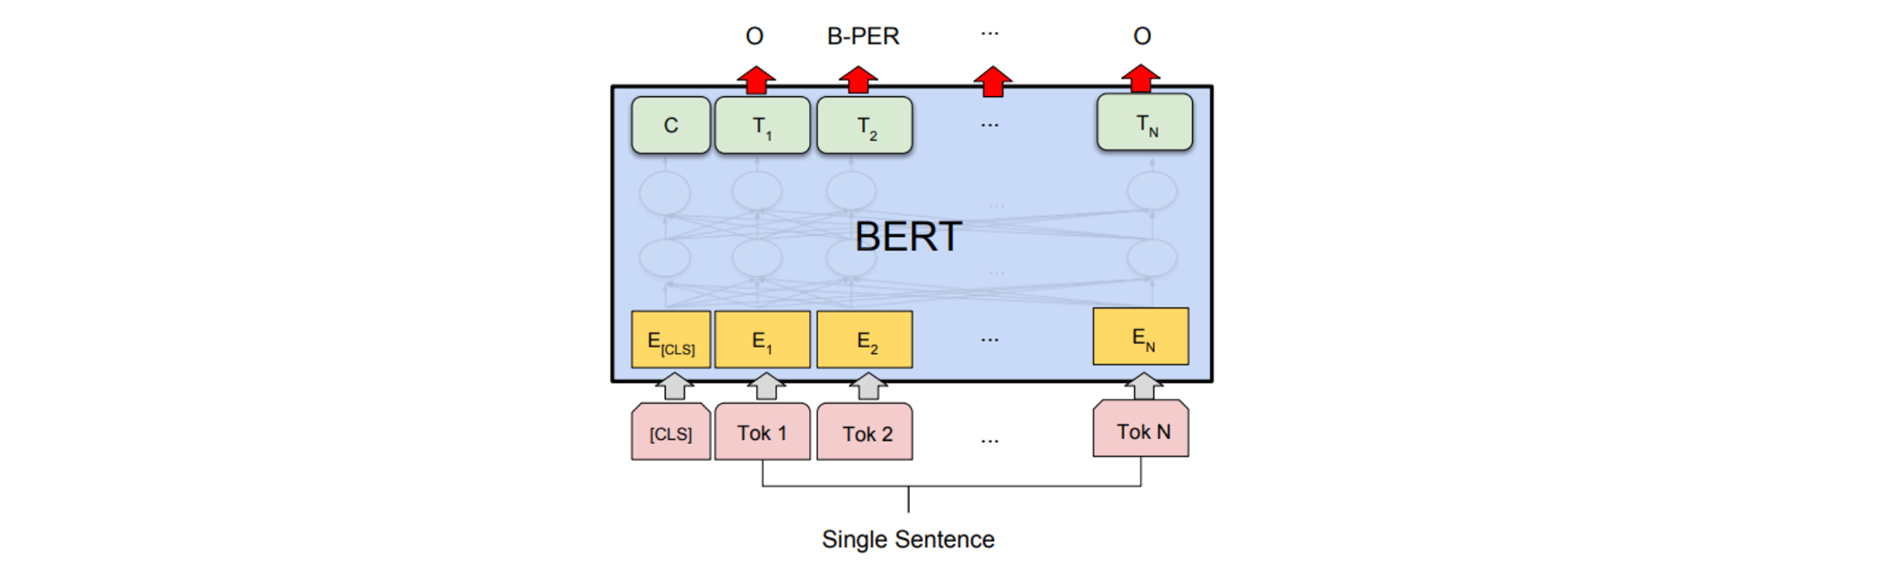

The model input is a sequence of N token identifiers `Tok 1`, `Tok 2`, ..., `Tok N`. The target is a sequence of N label identifiers `O`, `B-PER`, ..., `O`. This is just what we need!

### 6. BERT Pre-training (Optional)
You may notice that a special token `[CLS]` is given to the first input of the model, and the output label is not used at all. This is due to the BERT pre-training method.

BERT was trained on two tasks:

1. Next sentence prediction (NSP)
2. Masked word prediction (Mask LM).

To solve the first problem, two tokenized sentences were submitted to the BERT input, separated by a special token [SEP]. The model predicts whether the second sentence is a continuation of the first. This is a binary classification problem. The class label was obtained from output C.

To solve the second problem, randomly selected tokens in sentences were masked at the input, and the model had to predict which tokens were hidden by the mask.

Thus, due to the classification, an additional output from the model was required, and due to the peculiarities of the BERT architecture, the authors had to add an extra input to which a special token [CLS] is passed.

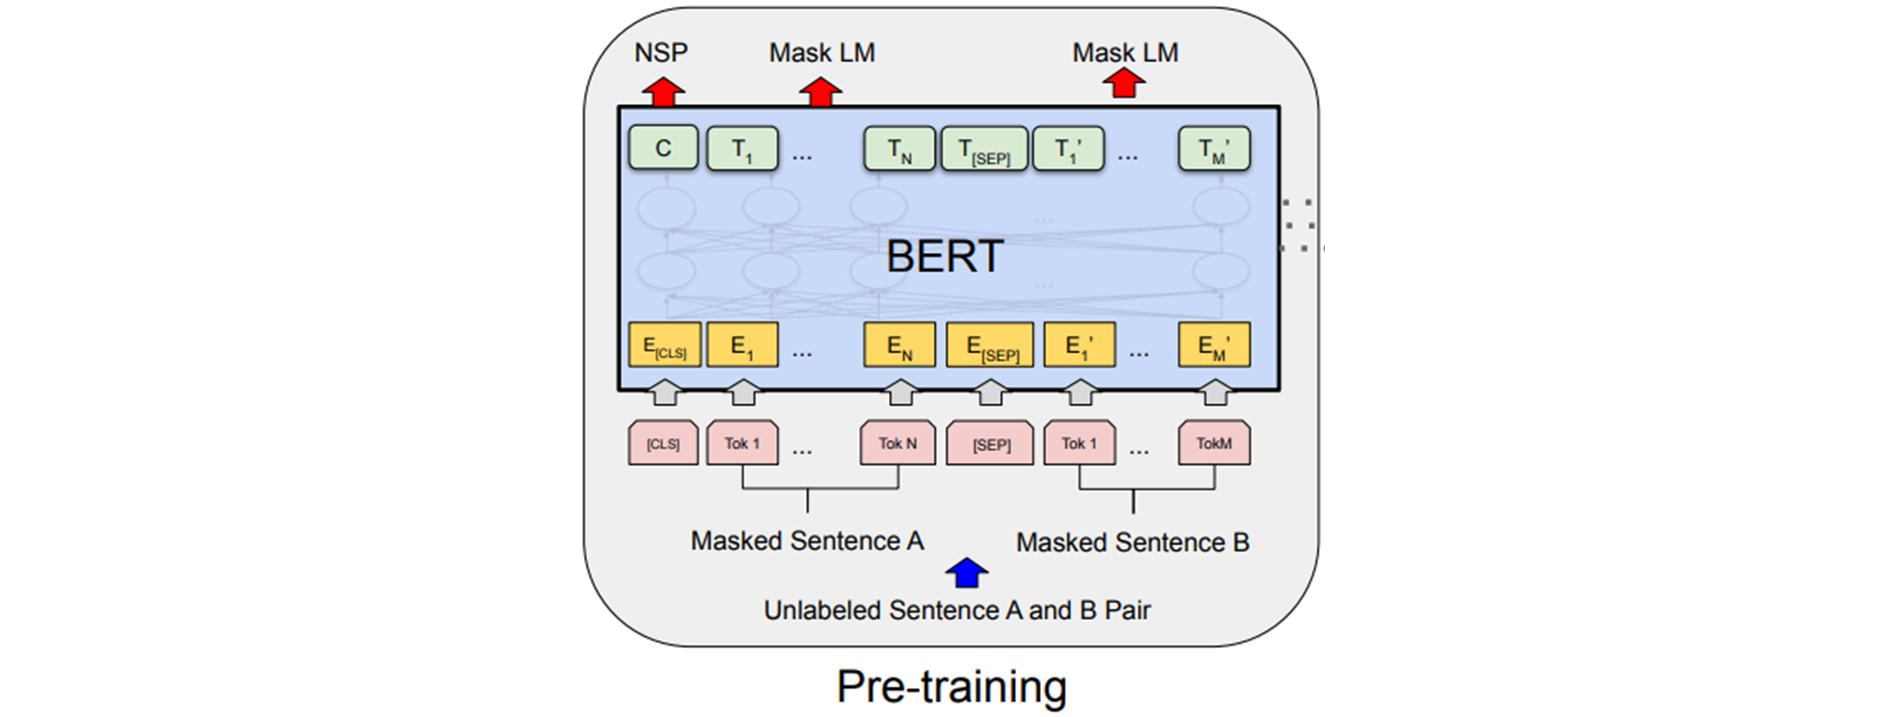

### 7. Hugging Face is all you need


To develop the model, we will use the <a href="https://huggingface.co/docs/transformers/index">transformers</a> library from Hugging Face. The documentation has a tutorial for every task that can be solved with this library. Here is a <a href="https://huggingface.co/docs/transformers/v4.27.2/en/tasks/token_classification#token-classification">token classification</a> tutorial.


We will also need to create a dataset from list of dictionaries for training the model. Dataset documentation can be found <a href="https://huggingface.co/docs/datasets/index">here</a>.


For evaluation the model on the test set we will need to use <a href="https://huggingface.co/docs/evaluate/index">evaluate</a> library.

### 8. Tasks

To train the model, we will use the __CoNLL2003__ dataset. It almost does not need to be processed, since it is already created in BIO format. Let's look at it.

In [ ]:
DATASPHERE = False

if DATASPHERE:
    # !!! ATTENTION for DataSphere !!!
    # You will need to restart kernel
    # after libraries installed
    
    %pip install transformers==4.49.0 evaluate seqeval accelerate
else:
    NO_GPU = True
    
    if NO_GPU:
        # Transformers library needs Keras 2 but we have Keras 3,
        # solution: https://github.com/orgs/community/discussions/118713
        
        !pip install tensorflow-cpu==2.16.1
        !pip install tf-keras==2.16.0 --no-dependencies
        !pip install transformers evaluate seqeval accelerate
    else:
        # You will need to downgrade PyTorch for GPU usage
        # because our CUDA drivers for GPU are old
        # so uncomment lines below if you are in
        # the GPU environment
        
        !pip install transformers==4.42.0

In [ ]:
%%bash

wget -q -nc "https://data.deepai.org/conll2003.zip"
unzip conll2003.zip

In [ ]:
# These instructions make it possible to load Python modules before executing code in any cell.
%load_ext autoreload
%autoreload 2

#### Task 1
Open the file `valid.txt` from the working directory in your favorite editor. Look at the data.

Implement function `read_data(path)`.
* Input: `path` - string, path to train, valid or test file.
* Output: `data` - list of dicts, list of tokens and labels that look like this:
```
[
    {
        'tokens': ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'],
        'labels': ['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']
    },
    {
        'tokens': [...],
        'labels': [...]
    },
    ...
]
```



In [ ]:
from collections import defaultdict

In [ ]:
def read_data(path):

    with open(path) as f:
        text = f.read()

    docs = text.split('\n\n')[1:-1]
    docs = [[item.split(' ') for item in doc.split('\n')] for doc in docs]

    data = list()
    for doc in docs:
        token_with_labels = defaultdict(list)

        for item in doc:
            token_with_labels['tokens'].append(item[0])
            token_with_labels['labels'].append(item[-1])

        data.append(dict(token_with_labels))

    return data

Read `train_data`, `valid_data` and `test_data` using `read_data` function.

In [ ]:
train_data = read_data('train.txt')
valid_data = read_data('valid.txt')
test_data = read_data('test.txt')

In [ ]:
train_data[100]

In [ ]:
tmp = {
    'tokens': ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.'],
    'labels': ['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']
}
assert train_data[0] == tmp

Look at the size of each sample.

In [ ]:
print('Train size:', len(train_data))
print('Valid size:', len(valid_data))
print('Test size:', len(valid_data))

#### Task 2
Gather all unique class labels into one list. The `reduce` function could be useful.

In [ ]:
from functools import reduce

In [ ]:
labels = set()

for sample in [train_data, valid_data, test_data]:
    l = reduce(lambda x, y: x | set(y['labels']), sample, set())
    labels.update(l)

labels = sorted(labels)

In [ ]:
assert labels == ['B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O']

Create two dictionaries `id2label` and `label2id` with mapping ids of labels to labels and vice versa.

In [ ]:
id2label = {i: l for i, l in enumerate(labels)}

label2id = {l: i for i, l in id2label.items()}

In [ ]:
for id_, token in id2label.items():
    assert label2id[token] == id_

#### Task 3
1. Create `Features` object.
2. Create `train`, `valid` and `test` datasets from lists `train_data`, `valid_data` and `train_data`.
3. Create `DatasetDict` from `train`, `valid` and `test` datasets.

`DatasetDict` will help to make a subword tokenization. An instances of the DatasetDict class and Dataset class have a `map(func, batched=True)` method that takes a preprocessing function as input and applies it to the entire dataset.

In [ ]:
from datasets import Dataset, DatasetDict
from datasets.features import Value, ClassLabel, Sequence, Features

In [ ]:
# Create Features object.

features = Features(
    {
        'tokens': Sequence(Value('string')),
        'labels': Sequence(ClassLabel(names=labels))
    }
)

In [ ]:
# Create train, valid and test datasets from lists 
# train_data, valid_data and train_data.

train = Dataset.from_list(train_data, features=features)
valid = Dataset.from_list(valid_data, features=features)
test = Dataset.from_list(test_data, features=features)

In [ ]:
# The element of dataset looks familiar.
train[0]

In [ ]:
# Create DatasetDict from train, valid and test datasets.

ner_dataset = DatasetDict({'train': train, 'valid': valid, 'test': test})

Before we train the model, we must perform tokenization. __Remember!__ You <u>must</u> use the exact tokenizer that was used during model pretraining. Why?


#### Task 4
Load a tokenizer for `bert-base-cased` model. It is the case sensitive model. If your texts has no capital letters you can use `bert-base-uncased` model.



In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

Let's take a look at the batch that is processed by the `map` method. Batch has the following structure (In this example, 5 elements of the dataset are selected):

In [ ]:
batch = {
    'tokens': [d['tokens'] for d in train_data[:5]],
    'labels': [d['labels'] for d in train_data[:5]]
}

batch['tokens'][0], batch['labels'][0]

Let's apply a tokenizer to the `batch`, indicating that the input is a list of words (`is_split_into_words=True`), not text, and also add special tokens (`add_special_tokens=True`). The `truncation=True` parameter means that we truncate sequences that exceed the maximum length.

It returns instance with 3 lists:
* input_ids - input ids of words.

* token_type_ids - сonsists of a sequence of consecutive zeros and then ones. Not used for the NER task, but used, for example, in the QA task, to indicate which tokens are related to the question (zeroes), and which to the answer (ones).

* attention_mask - сonsists of zeros and ones. Shows models for which input tokens attention should be calculated. When the model is trained, a batch is fed to its input, which is a tensor with input identifiers. Since all sequences have different lengths, they are padded with PAD tokens to the maximum length when forming a batch. The attention mask is used just to ignore PAD tokens. Ones correspond to input tokens, zeros correspond to PAD tokens.

In [ ]:
tokenized_inputs = tokenizer(
    batch['tokens'], 
    is_split_into_words=True, 
    add_special_tokens=True, 
    truncation=True, 
    padding=True, 
    max_length=15
)
tokenized_inputs

In addition to these three lists, there are many useful methods in the object returned by the tokenizer.

* `tokenized_inputs.tokens(i)` - returns the tokens that match the input ids of the i-th document in the batch.

* `tokenized_inputs.word_ids(i)` - returns the indexes of the original words corresponding to the input ids of the i-th document.

Below is an example for the first document in a batch.

As you can see the word `lamb` has been split into two tokens `la` and `##mb`. This means that we have to align the labels, that the `##mb` token also needs to be labeled. In addition, you need to label special `CLS` and `SEP` tokens.



In [ ]:
import pandas as pd

i = 0

pd.DataFrame(
    zip(
        tokenized_inputs.word_ids(i),
        tokenized_inputs.tokens(i),
        tokenized_inputs['input_ids'][i],
        tokenized_inputs['attention_mask'][i]
    ),
    columns=['word_ids', 'tokens', 'input_ids', 'attention_mask']
)

Label alignment can be done by the following algorithm:

1. We make subword tokenization of input tokens in the batch, just like we did before.
2. For each document in the batch, we determine the indexes of the corresponding original words `word_ids` using the method `tokenized inputs.word_ids(i)`.
3. For each index in `word_ids` we set labels following way:
    * if we met index first time, then we add original label to the list.
    * otherwise we add -100. This means that the training algorithm will ignore this label when calculating the loss function.
    * if index is none then again we add -100.

#### Task 5

Write a function `tokenize_and_align_labels(batch)` that takes a `batch` as input and returns the result of tokenization with an additional `labels` array.

In [ ]:
def tokenize_and_align_labels(batch):
    '''
    Align labels

    Params
    :batch - input batch with keys 'tokens', 'labels'.

    Output
    :tokenized_inputs - result of tokenization and alignment with keys:
        - 'input_ids'
        - 'token_type_ids'
        - 'attention_mask'
        - 'labels'
    
    '''
    tokenized_inputs = tokenizer(
        batch['tokens'],
        add_special_tokens=True,
        truncation=True,
        is_split_into_words=True
    )

    labels = []
    for i, labels_list in enumerate(batch['labels']):

        word_ids = tokenized_inputs.word_ids(i)
        previous_word_idx = None
        label_ids = []

        for word_idx in word_ids:

            if word_idx is None:
                label_ids.append(-100)

            elif word_idx != previous_word_idx:
                label_ids.append(labels_list[word_idx])

            else:
                label_ids.append(-100)

            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs['labels'] = labels

    return tokenized_inputs

Let's map this function to a dataset.

In [ ]:
tokenized_ner_dataset = ner_dataset.map(tokenize_and_align_labels, batched=True)

In [ ]:
tokenized_ner_dataset['train'][0]

To generate batches, we must create an appropriate data collator.

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

To estimate the quality of the model, we will use the precision, recall and f1-score metrics. They are implemented in the `seqeval` package. For convenience, this package has been integrated into the evaluate library from hugging face.

In [ ]:
import evaluate

seqeval = evaluate.load('seqeval')

In order to calculate the metrics, we must implement a function that does this.

Let's call it `compute_metrics(p)`. The `p` parameter contains a tuple with two tensors. The first tensor is the model's predictions, the second tensor is the actual indexes of labels. The tensor with actual values ​​has the dimension $batch\_size \times sequence\_length$. The tensor with prediction has the dimension $batch\_size \times sequence\_length \times count\_of\_classes$. Each element of this tensor is the probability that the token's input index corresponds to a particular class label. Typically, the class label for each token in each sequence is chosen by the maximum probability.

Task 6.
Implement the `compute_metrics` function.

1. Create lists `true_predictions` and `true_labels` that contain the names (not indices) of the predicted and actual classes, respectively.

2. Exclude those labels from both lists that match index -100 in the list with actual labels.


In [ ]:
import numpy as np

def compute_metrics(p):

    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [id2label[pr] for (pr, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [id2label[l] for (pr, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = seqeval.compute(predictions=true_predictions, references=true_labels, mode='strict')
    return {
        'precision': results['overall_precision'],
        'recall': results['overall_recall'],
        'f1': results['overall_f1'],
        'accuracy': results['overall_accuracy']
    }

Now we can load pretrained model...

In [ ]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

model = AutoModelForTokenClassification.from_pretrained(
    'bert-base-cased', 
    num_labels=len(id2label), 
    id2label=id2label, 
    label2id=label2id
)

...define training arguments and start training.

In [ ]:
%%time

training_args = TrainingArguments(
    output_dir="ner_model",
    learning_rate=5e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=2,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model='eval_f1',
    greater_is_better=True,
    logging_steps=1
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_ner_dataset['train'],
    eval_dataset=tokenized_ner_dataset['valid'],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()

Let's visualize the learning curves

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
train_losses = [
    {
        'epoch': dct['epoch'],
        'loss': dct['loss']
    }
    for dct in trainer.state.log_history if 'loss' in dct
]

train_losses = pd.DataFrame(train_losses).set_index('epoch')

In [ ]:
valid_losses = [
    {
        'epoch': dct['epoch'],
        'eval_loss': dct['eval_loss'],
        'eval_precision': dct['eval_precision'],
        'eval_recall': dct['eval_recall'],
        'eval_f1': dct['eval_f1'],
        'eval_accuracy': dct['eval_accuracy'],
    }
    for dct in trainer.state.log_history if 'eval_loss' in dct
]

valid_losses = pd.DataFrame(valid_losses).set_index('epoch')

In [ ]:
losses = pd.concat([train_losses, valid_losses])

In [ ]:
px.line(losses[['loss', 'eval_loss']], template='plotly_dark')

In [ ]:
eval_metrics = ['eval_precision', 'eval_recall', 'eval_f1', 'eval_accuracy']
px.line(losses[losses.index >= 1][eval_metrics], template='plotly_dark')

This is how you can find the best models dir.

In [ ]:
trainer.state.best_model_checkpoint

The transformers library has a very convenient pipeline wrapper that implements the tokenization logic for applying the model.

Let's load the weights of the best model and pass the model along with the tokenizer to the pipeline.

In [ ]:
from transformers import pipeline

model = AutoModelForTokenClassification.from_pretrained(trainer.state.best_model_checkpoint)

In [ ]:
ner = pipeline(task='token-classification', model=model, tokenizer=tokenizer, device=0)

It remains to test the model. Let's create an instance of the evaluator class for the task of classifying tokens, and then
pass the pipeline, test dataset and metric to the compute method. The method will return a dictionary with metrics.

In [ ]:
%%writefile /opt/conda/lib/python3.12/site-packages/evaluate/evaluator/token_classification.py
# or use string below for DataSphere version
#%%writefile ~/.local/lib/python3.10/site-packages/evaluate/evaluator/token_classification.py

# Copyright 2022 The HuggingFace Evaluate Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from typing import TYPE_CHECKING, Any, Callable, Dict, List, Optional, Tuple, Union

from datasets import ClassLabel, Dataset, Sequence
from typing_extensions import Literal

from ..module import EvaluationModule
from ..utils.file_utils import add_end_docstrings, add_start_docstrings
from .base import EVALUATOR_COMPUTE_RETURN_DOCSTRING, EVALUTOR_COMPUTE_START_DOCSTRING, Evaluator
from .utils import DatasetColumn


if TYPE_CHECKING:
    from transformers import Pipeline, PreTrainedModel, PreTrainedTokenizer, TFPreTrainedModel


TASK_DOCUMENTATION = r"""
    The dataset input and label columns are expected to be formatted as a list of words and a list of labels respectively, following [conll2003 dataset](https://huggingface.co/datasets/conll2003). Datasets whose inputs are single strings, and labels are a list of offset are not supported.

    Examples:
    ```python
    >>> from evaluate import evaluator
    >>> from datasets import load_dataset
    >>> task_evaluator = evaluator("token-classification")
    >>> data = load_dataset("conll2003", split="validation[:2]")
    >>> results = task_evaluator.compute(
    >>>     model_or_pipeline="elastic/distilbert-base-uncased-finetuned-conll03-english",
    >>>     data=data,
    >>>     metric="seqeval",
    >>> )
    ```

    <Tip>

    For example, the following dataset format is accepted by the evaluator:

    ```python
    dataset = Dataset.from_dict(
        mapping={
            "tokens": [["New", "York", "is", "a", "city", "and", "Felix", "a", "person", "."]],
            "ner_tags": [[1, 2, 0, 0, 0, 0, 3, 0, 0, 0]],
        },
        features=Features({
            "tokens": Sequence(feature=Value(dtype="string")),
            "ner_tags": Sequence(feature=ClassLabel(names=["O", "B-LOC", "I-LOC", "B-PER", "I-PER"])),
            }),
    )
    ```

    </Tip>

    <Tip warning={true}>

    For example, the following dataset format is **not** accepted by the evaluator:

    ```python
    dataset = Dataset.from_dict(
        mapping={
            "tokens": [["New York is a city and Felix a person."]],
            "starts": [[0, 23]],
            "ends": [[7, 27]],
            "ner_tags": [["LOC", "PER"]],
        },
        features=Features({
            "tokens": Value(dtype="string"),
            "starts": Sequence(feature=Value(dtype="int32")),
            "ends": Sequence(feature=Value(dtype="int32")),
            "ner_tags": Sequence(feature=Value(dtype="string")),
        }),
    )
    ```

    </Tip>
"""


class TokenClassificationEvaluator(Evaluator):
    """
    Token classification evaluator.

    This token classification evaluator can currently be loaded from [`evaluator`] using the default task name
    `token-classification`.

    Methods in this class assume a data format compatible with the [`~transformers.TokenClassificationPipeline`].
    """

    PIPELINE_KWARGS = {"ignore_labels": []}

    def __init__(self, task="token-classification", default_metric_name=None):
        super().__init__(task, default_metric_name=default_metric_name)

    def predictions_processor(self, predictions: List[List[Dict]], words: List[List[str]], join_by: str):
        """
        Transform the pipeline predictions into a list of predicted labels of the same length as the true labels.

        Args:
            predictions (`List[List[Dict]]`):
                List of pipeline predictions, where each token has been labeled.
            words (`List[List[str]]`):
                Original input data to the pipeline, used to build predicted labels of the same length.
            join_by (`str`):
                String to use to join two words. In English, it will typically be " ".

        Returns:
            `dict`: a dictionary holding the predictions
        """
        preds = []

        # iterate over the data rows
        for i, prediction in enumerate(predictions):
            pred_processed = []

            # get a list of tuples giving the indexes of the start and end character of each word
            words_offsets = self.words_to_offsets(words[i], join_by)

            token_index = 0
            for word_offset in words_offsets:
                # for each word, we may keep only the predicted label for the first token, discard the others
                while prediction[token_index]["start"] < word_offset[0]:
                    token_index += 1

                if prediction[token_index]["start"] > word_offset[0]:  # bad indexing
                    pred_processed.append("O")
                elif prediction[token_index]["start"] == word_offset[0]:
                    pred_processed.append(prediction[token_index]["entity"])

            preds.append(pred_processed)

        return {"predictions": preds}

    def words_to_offsets(self, words: List[str], join_by: str):
        """
        Convert a list of words to a list of offsets, where word are joined by `join_by`.

        Args:
            words (`List[str]`):
                List of words to get offsets from.
            join_by (`str`):
                String to insert between words.

        Returns:
            `List[Tuple[int, int]]`: List of the characters (start index, end index) for each of the words.
        """
        offsets = []

        start = 0
        for word in words:
            end = start + len(word) - 1
            offsets.append((start, end))
            start = end + len(join_by) + 1

        return offsets

    def prepare_data(self, data: Union[str, Dataset], input_column: str, label_column: str, join_by: str):
        super().prepare_data(data, input_column, label_column)

        if not isinstance(data.features[input_column], Sequence) or not isinstance(
            data.features[label_column], Sequence
        ):
            raise ValueError(
                "TokenClassificationEvaluator expects the input and label columns to be provided as lists."
            )

        # If the labels are of type ClassLabel, they are already integers and we have the map stored somewhere.
        # Otherwise, we have to get the list of labels manually.
        labels_are_int = isinstance(data.features[label_column].feature, ClassLabel)
        if labels_are_int:
            label_list = data.features[label_column].feature.names  # list of string labels
            id_to_label = {i: label for i, label in enumerate(label_list)}
            references = [[id_to_label[label_id] for label_id in label_ids if label_id != -100] for label_ids in data[label_column]]
        elif data.features[label_column].feature.dtype.startswith("int"):
            raise NotImplementedError(
                "References provided as integers, but the reference column is not a Sequence of ClassLabels."
            )
        else:
            # In the event the labels are not a `Sequence[ClassLabel]`, we have already labels as strings
            # An example is labels as ["PER", "PER", "O", "LOC", "O", "LOC", "O"], e.g. in polyglot_ner dataset
            references = data[label_column]

        metric_inputs = {"references": references}
        data = data.map(lambda x: {input_column: join_by.join(x[input_column])})
        pipeline_inputs = DatasetColumn(data, input_column)

        return metric_inputs, pipeline_inputs

    def prepare_pipeline(
        self,
        model_or_pipeline: Union[str, "Pipeline", Callable, "PreTrainedModel", "TFPreTrainedModel"],  # noqa: F821
        tokenizer: Union["PreTrainedTokenizerBase", "FeatureExtractionMixin"] = None,  # noqa: F821
        feature_extractor: Union["PreTrainedTokenizerBase", "FeatureExtractionMixin"] = None,  # noqa: F821
        device: int = None,
    ):
        pipe = super().prepare_pipeline(model_or_pipeline, tokenizer, feature_extractor, device)

        # check the pipeline outputs start characters in its predictions
        dummy_output = pipe(["2003 New York Gregory"], **self.PIPELINE_KWARGS)
        if dummy_output[0][0]["start"] is None:
            raise ValueError(
                "TokenClassificationEvaluator supports only pipelines giving 'start' index as a pipeline output (got None). "
                "Transformers pipelines with a slow tokenizer will raise this error."
            )

        return pipe

    @add_start_docstrings(EVALUTOR_COMPUTE_START_DOCSTRING)
    @add_end_docstrings(EVALUATOR_COMPUTE_RETURN_DOCSTRING, TASK_DOCUMENTATION)
    def compute(
        self,
        model_or_pipeline: Union[
            str, "Pipeline", Callable, "PreTrainedModel", "TFPreTrainedModel"  # noqa: F821
        ] = None,
        data: Union[str, Dataset] = None,
        subset: Optional[str] = None,
        split: str = None,
        metric: Union[str, EvaluationModule] = None,
        tokenizer: Optional[Union[str, "PreTrainedTokenizer"]] = None,  # noqa: F821
        strategy: Literal["simple", "bootstrap"] = "simple",
        confidence_level: float = 0.95,
        n_resamples: int = 9999,
        device: Optional[int] = None,
        random_state: Optional[int] = None,
        input_column: str = "tokens",
        label_column: str = "ner_tags",
        join_by: Optional[str] = " ",
    ) -> Tuple[Dict[str, float], Any]:
        """
        input_column (`str`, defaults to `"tokens"`):
            The name of the column containing the tokens feature in the dataset specified by `data`.
        label_column (`str`, defaults to `"label"`):
            The name of the column containing the labels in the dataset specified by `data`.
        join_by (`str`, *optional*, defaults to `" "`):
            This evaluator supports dataset whose input column is a list of words. This parameter specifies how to join
            words to generate a string input. This is especially useful for languages that do not separate words by a space.
        """
        result = {}

        self.check_for_mismatch_in_device_setup(device, model_or_pipeline)

        # Prepare inputs
        data = self.load_data(data=data, subset=subset, split=split)
        metric_inputs, pipe_inputs = self.prepare_data(
            data=data, input_column=input_column, label_column=label_column, join_by=join_by
        )
        pipe = self.prepare_pipeline(model_or_pipeline=model_or_pipeline, tokenizer=tokenizer, device=device)
        metric = self.prepare_metric(metric)

        # Compute predictions
        predictions, perf_results = self.call_pipeline(pipe, pipe_inputs)
        predictions = self.predictions_processor(predictions, data[input_column], join_by)
        metric_inputs.update(predictions)

        # Compute metrics from references and predictions
        metric_results = self.compute_metric(
            metric=metric,
            metric_inputs=metric_inputs,
            strategy=strategy,
            confidence_level=confidence_level,
            n_resamples=n_resamples,
            random_state=random_state,
        )

        result.update(metric_results)
        result.update(perf_results)

        return result

In [ ]:
from evaluate import evaluator
eval = evaluator('token-classification')
# eval.METRIC_KWARGS['average'] = 'weighted'
results = eval.compute(
    model_or_pipeline=ner,
    data=tokenized_ner_dataset['test'],
    metric=seqeval,
    strategy='simple',
    label_column='labels',
    random_state=2025
)

Let's transform the dictionary to the human readable dataframe.

In [ ]:
pd.DataFrame(results).T

Write texts and apply the model!

In [ ]:
text1 = '''King Charles’s state visit to France has been postponed amid planned protests over the French government’s controversial pension reforms.
Both France’s Élysée Palace and Buckingham Palace confirmed the trip had been shelved on Friday morning.
The British monarch and Queen Consort were supposed to visit the country from Sunday through Wednesday, and they would have traveled to Paris and the southwestern city of Bordeaux. However a decision to postpone the visit was made after demonstrations turned violent in some areas, including Bordeaux, on Thursday.
Clashes between groups of protesters angry over proposed pension reforms and police broke out after workers staged a national strike throughout Thursday, with flare-ups in Paris and regional capitals. In Bordeaux, demonstrators set fire to the entrance of the city hall during skirmishes with police, according to CNN affiliate BFMTV.
'''

text2 = '''A day after China said it drove a US Navy destroyer away from Beijing-claimed waters in the South China Sea, the US 7th Fleet said the same warship sailed through those waters to challenge the Chinese claims.
The “guided-missile destroyer USS Milius asserted navigational rights and freedoms in the South China Sea near the Paracel Islands, consistent with international law,” a statement from 7th Fleet spokesperson Lt. jg. Luka Bakic said.
The warship conducted what the US Navy calls a “freedom of navigation operation,” or FONOP, Bakic said, “challenging the restrictions on innocent passage imposed by the People’s Republic of China (PRC), Taiwan, and Vietnam.”
All three claim the Paracels, known as the Xishas in China, a group of about 130 small atolls, the biggest of which are home to Chinese military bases.
The US statement also said the Milius challenged China’s claim to “straight baselines enclosing the Paracels,” meaning Beijing’s claims to waters between the islands, even when those waters are outside the internationally recognized 12-nautical-mile limit from a coastline for territorial waters.
China claims almost all of the vast South China Sea as part of its territorial waters, including many distant islands and inlets in the disputed body of water, many of which Beijing has militarized.
Other claimants besides Taiwan and Vietnam include Brunei, Malaysia, Indonesia and the Philippines, which has seen a UN tribunal rule in its favor in a dispute with Beijing over islands in the Spratly group.
But Beijing has rejected the UN ruling, and built up military bases on those disputed islands in the Spratlys – known as the Nansha Islands in China – as it has done in the Paracels.
On Friday, China reacted angrily to the presence of the US warship near the islands it claims.
“The actions of the U.S. military have seriously violated China’s sovereignty and security and seriously violated international law,” Tan Kefei, spokesperson for the Defense Ministry, said in a statement.
“The guided-missile destroyer USS Milius broke into China’s Xisha territorial waters again without the approval of the Chinese government, undermining peace and stability in the South China Sea,” Tan said.
On Thursday, Beijing said the Milius was driven away from the Paracels by People’s Liberation Army forces, a claim that was called “false” by the US 7th Fleet.
Beijing has made similar claims after other FONOPs, which the US conducts regularly around the Paracels and the Spratlys to the south.
The Paracels are located east of Da Nang, Vietnam, and south of China’s Hainan Island.
'''

texts = [text1, text2]

In [ ]:
predictions = ner(texts)

In [ ]:
predictions[0][:5]

As you can see, the model returns a list of dictionaries with the following keys:

'entity': token class.  
'score': - probability of class.  
'index': - index of token in sequence.  
'word': token.  
'start': start position of token in text.  
'end': end position of token in text.  


It would be nice to find substrings that belong to the same entity. In other words, if the list contains consecutive dictionaries with classes B-CLASS, I-CLASS, I-CLASS..., then one dictionary can be formed from them.


For example this two dictionaries
```
{
    'entity': 'B-PER',
    'score': 0.9071498,
    'index': 2,
    'word': 'Charles',
    'start': 5,
    'end': 12
}
{
    'entity': 'I-PER',
    'score': 0.99970204,
    'index': 8,
    'word': 'Cumberbatch',
    'start': 13,
    'end': 23
}
```
can be transformed to single dictionary:
```
{
    'entity': 'PER',
    'start': 5,
    'end': 23
}
```

Implement the function `get_entities_positions`, which takes list of predictions with dictionaries.

0. Create an empty list.
1. Iterate over predictions.
2. If current entity starts with `B` prefix, then create a new dictionary with the same label but without prefix, and with the same start position and end position.
3. Add this dictionary to the list.
4. If current entity starts with `I` prefix and the label equal the label of previous entity then update the end position in last dictionary in the list.

In [ ]:
def get_entities_positions(prediction):

    entities = []

    for p in prediction:

        if p['entity'].startswith('B'):
            entity = {
                'label': p['entity'][2:],
                'start': p['start'],
                'end': p['end']
            }
            entities.append(entity)

        elif p['entity'].startswith('I') and p['entity'][2:] == entities[-1]['label']:
            entities[-1]['end'] = p['end']

    return entities

Run cells below for visualization.

In [ ]:
def highlight(text, entities, entity_colors):

    highlighted_text = ''
    cur_pos = 0

    for e in sorted(entities, key=lambda x: x['start']):
        highlighted_text += text[cur_pos:e['start']]
        highlighted_text += '<span style="color:black; background: {}; border-radius: 0.35em">'.format(entity_colors[e['label']])
        highlighted_text += text[e['start']:e['end']]
        highlighted_text += ' <span style="color:black; font-weight: bold; border-radius: 0.35em; vertical-align: middle">{}</span>'.format(e['label'])
        highlighted_text += '</span>'
        cur_pos = e['end']

    highlighted_text += text[cur_pos:]
    highlighted_text = '<span style="white-space: pre-wrap">' + highlighted_text + '</span>'

    from IPython.core.display import display, HTML
    display(HTML(highlighted_text))

In [ ]:
entity_colors = {
    'MISC': 'silver',
    'LOC': 'lightsalmon',
    'ORG': 'aqua',
    'PER': 'springgreen'
}

for text, prediction in zip(texts, predictions):

    print('-------------------------------------------------------------------------------------------------------------')
    print()

    entities = get_entities_positions(prediction)
    highlight(text, entities, entity_colors)

    print()